In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset
df = pd.read_csv('Crop.csv')
data_shape = df.shape

# Visualize the data
data_head = df.head()

# Information of data
data_info = df.info()
data_shape, data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


((2200, 8),
     N   P   K  temperature   humidity        ph    rainfall label
 0  73  57  44    20.879744  82.002744  6.502985  202.935536  rice
 1  74  57  44    21.770462  80.319644  7.038096  226.655537  rice
 2  92  41  38    23.004459  82.320763  7.840207  263.964248  rice
 3  68  44  38    26.491096  80.158363  6.980401  242.864034  rice
 4  66  36  40    20.130175  81.604873  7.628473  262.717340  rice,
 None)

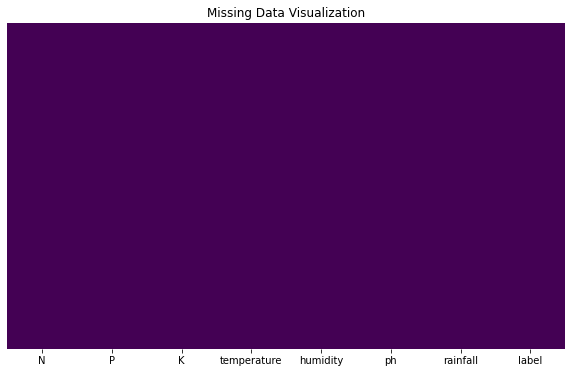

<Figure size 1080x720 with 0 Axes>

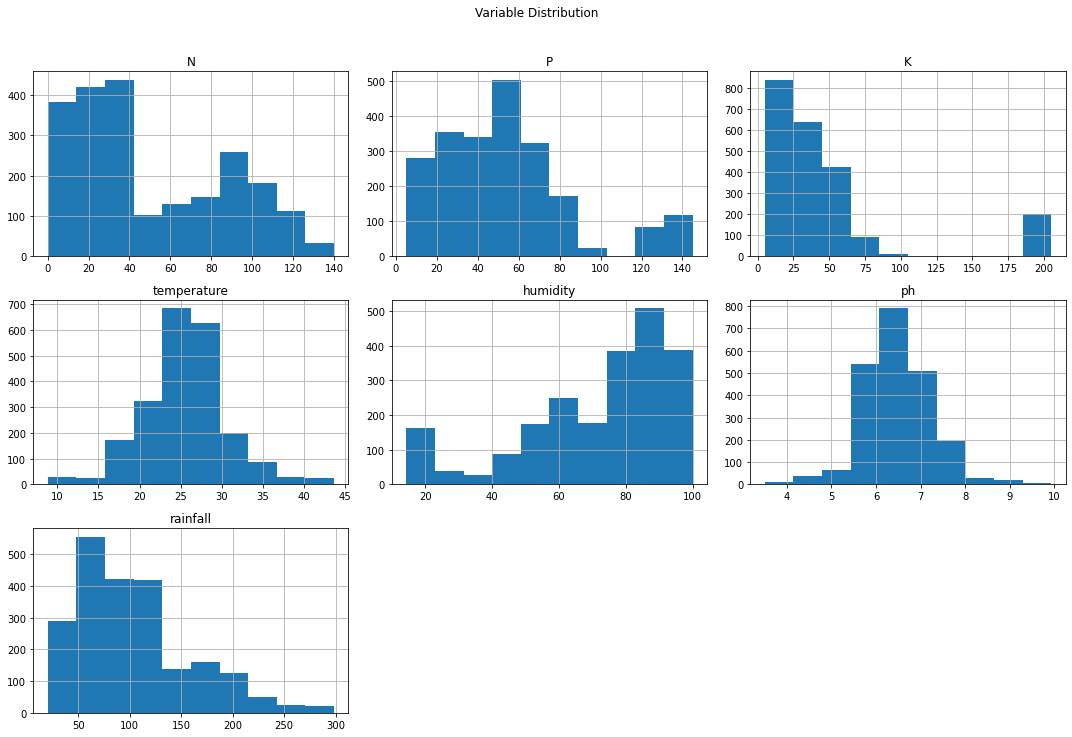

C:\Users\77525\AppData\Local\Temp\ipykernel_11824\3534735468.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values_annotated = ("Average Values:", df.mean())
C:\Users\77525\AppData\Local\Temp\ipykernel_11824\3534735468.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values_annotated = ("Median Values:", df.median())
C:\Users\77525\AppData\Local\Temp\ipykernel_11824\3534735468.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance_values_annotated = ("Varia

(('Average Values:',
  N               49.992727
  P               53.300000
  K               48.169545
  temperature     25.616244
  humidity        71.481779
  ph               6.469480
  rainfall       103.463655
  dtype: float64),
 ('Median Values:',
  N              37.000000
  P              51.000000
  K              31.000000
  temperature    25.598693
  humidity       80.473146
  ph              6.425045
  rainfall       94.867624
  dtype: float64),
 ('Mode Values:',
  N                   39.0
  P                   55.0
  K                   25.0
  temperature     8.825675
  humidity        14.25804
  ph              3.504752
  rainfall       20.211267
  label              apple
  Name: 0, dtype: object),
 ('Variance Values:',
  N              1383.531552
  P              1067.728968
  K              2567.701573
  temperature      25.641550
  humidity        495.677307
  ph                0.598980
  rainfall       3020.424469
  dtype: float64))

In [3]:
# Missing data visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Variable distribution
features = df.drop("label", axis=1)
plt.figure(figsize=(15, 10))
features.hist(figsize=(15, 10))
plt.suptitle('Variable Distribution', y=1.02)
plt.tight_layout()
plt.show()

# Mean, Median, Mode, Variance
mean_values_annotated = ("Average Values:", df.mean())
median_values_annotated = ("Median Values:", df.median())
mode_values_annotated = ("Mode Values:", df.mode().iloc[0])
variance_values_annotated = ("Variance Values:", df.var())

mean_values_annotated, median_values_annotated, mode_values_annotated, variance_values_annotated

In [4]:
from sklearn.model_selection import train_test_split

df['label'] = pd.Categorical(df['label'])
df['label_code'] = df['label'].cat.codes

X = df.drop(["label", "label_code"], axis=1)
y = df['label_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_test_shapes_annotated = ("Training data shape (features):", X_train.shape, 
                              "Training data shape (labels):", y_train.shape,
                              "Test data shape (features):", X_test.shape,
                              "Test data shape (labels):", y_test.shape)

train_test_shapes_annotated

('Training data shape (features):',
 (1760, 7),
 'Training data shape (labels):',
 (1760,),
 'Test data shape (features):',
 (440, 7),
 'Test data shape (labels):',
 (440,))

In [ ]:
correlation = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()

label_correlation_annotated = ("Correlation with label_code:", correlation['label_code'])

label_correlation_annotated